In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import datetime
from sklearn import preprocessing
# from tpot import TPOTRegressor
sns.set()

In [96]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

train.head()


,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [97]:
test.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
0,2017-05-18 00:00:00,None,73,63,1,27,4,4,285.15,0.0,0,90,Rain,moderate rain
1,2017-05-18 00:00:00,None,251,63,1,27,4,4,285.15,0.0,0,90,Mist,mist
2,2017-05-18 00:00:00,None,75,56,1,0,1,1,285.15,0.0,0,90,Drizzle,light intensity drizzle
3,2017-05-18 01:00:00,None,98,56,1,351,2,2,284.79,0.0,0,90,Rain,heavy intensity rain
4,2017-05-18 01:00:00,None,283,56,1,351,1,1,284.79,0.0,0,90,Mist,mist


In [98]:
train.shape

(33750, 15)

In [99]:
test.shape

(14454, 14)

In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 15 columns):
date_time              33750 non-null object
is_holiday             33750 non-null object
air_pollution_index    33750 non-null int64
humidity               33750 non-null int64
wind_speed             33750 non-null int64
wind_direction         33750 non-null int64
visibility_in_miles    33750 non-null int64
dew_point              33750 non-null int64
temperature            33750 non-null float64
rain_p_h               33750 non-null float64
snow_p_h               33750 non-null float64
clouds_all             33750 non-null int64
weather_type           33750 non-null object
weather_description    33750 non-null object
traffic_volume         33750 non-null int64
dtypes: float64(3), int64(8), object(4)
memory usage: 3.9+ MB


In [101]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14454 entries, 0 to 14453
Data columns (total 14 columns):
date_time              14454 non-null object
is_holiday             14454 non-null object
air_pollution_index    14454 non-null int64
humidity               14454 non-null int64
wind_speed             14454 non-null int64
wind_direction         14454 non-null int64
visibility_in_miles    14454 non-null int64
dew_point              14454 non-null int64
temperature            14454 non-null float64
rain_p_h               14454 non-null float64
snow_p_h               14454 non-null int64
clouds_all             14454 non-null int64
weather_type           14454 non-null object
weather_description    14454 non-null object
dtypes: float64(2), int64(8), object(4)
memory usage: 1.5+ MB


In [102]:
duplicateRowsDF = train[train.duplicated(['date_time'])]
duplicateRowsDF
train.drop_duplicates(subset ="date_time", keep = "first", inplace = True) 
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28589 entries, 0 to 33748
Data columns (total 15 columns):
date_time              28589 non-null object
is_holiday             28589 non-null object
air_pollution_index    28589 non-null int64
humidity               28589 non-null int64
wind_speed             28589 non-null int64
wind_direction         28589 non-null int64
visibility_in_miles    28589 non-null int64
dew_point              28589 non-null int64
temperature            28589 non-null float64
rain_p_h               28589 non-null float64
snow_p_h               28589 non-null float64
clouds_all             28589 non-null int64
weather_type           28589 non-null object
weather_description    28589 non-null object
traffic_volume         28589 non-null int64
dtypes: float64(3), int64(8), object(4)
memory usage: 3.5+ MB


In [103]:
train.isnull().sum()

date_time              0
is_holiday             0
air_pollution_index    0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
weather_description    0
traffic_volume         0
dtype: int64

In [104]:
test.isnull().sum()

date_time              0
is_holiday             0
air_pollution_index    0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
weather_description    0
dtype: int64

In [105]:
# for i in train['dayofweek']:
#     if i==7:
#         train['is_holiday']=1
    
# train["is_holiday"]=1
for index, row in train.iterrows():
#     if train.loc[index,'dayofweek']==6:
#         train.loc[index,'is_holiday']=1
#     if train.loc[index,'dayofweek']==5:
#         train.loc[index,'is_holiday']=1
# for index, row in train.iterrows():
    if(row['temperature']==0):
        train.drop(index,inplace=True)
    if(row['rain_p_h']>60):
        train.drop(index,inplace=True)
    if(row['snow_p_h']>0.2):
        train.drop(index,inplace=True)
#     if(row['traffic_volume']<100):
#         train.drop(index,inplace=True)
        
  
    
    
#     if train.loc[index,'wind_direction']==0:
#         train.loc[index,'wind_direction']=199.471852

In [106]:
# fig, ax = plt.subplots()
# ax.scatter(x = train['wind_speed'], y = train['traffic_volume'])
# plt.ylabel('traffic_volume')
# plt.xlabel('speed')
# #ax.set_xlim([240,310])
# plt.show()

In [107]:
# fig, ax = plt.subplots()
# ax.scatter(x = train['temperature'], y = train['traffic_volume'])
# plt.ylabel('traffic_volume')
# plt.xlabel('temperatre')
# #ax.set_xlim([240,310])
# plt.show()

In [108]:
# fig, ax = plt.subplots()
# ax.scatter(x = train['humidity'], y = train['traffic_volume'])
# plt.ylabel('traffic_volume')
# plt.xlabel('humidity')
# plt.show()

In [109]:
# fig, ax = plt.subplots()
# ax.scatter(x = train['rain_p_h'], y = train['traffic_volume'])
# plt.ylabel('traffic_volume')
# plt.xlabel('rain_p_h')
# ax.set_xlim([0,20])
# plt.show()

In [110]:
# fig, ax = plt.subplots()
# ax.scatter(x = train['date_time'], y = train['traffic_volume'])
# plt.ylabel('traffic_volume')
# plt.xlabel('date_time')
# ax.set_xlim([0,20])
# plt.show()

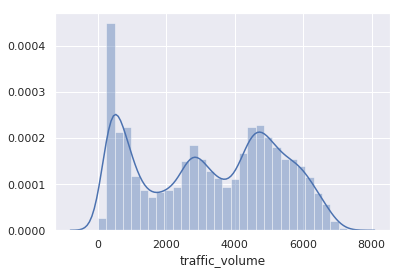

In [111]:
sns.distplot(train['traffic_volume'])

In [112]:
from datetime import datetime
train['date_time'] = pd.to_datetime(train.date_time)
train['year'] = train['date_time'].dt.year
train['month'] = train['date_time'].dt.month
train['day'] = train['date_time'].dt.day
train['dayofyear'] = train['date_time'].dt.dayofyear
train['weekofyear'] = train['date_time'].dt.weekofyear
train['dayofweek'] = train['date_time'].dt.dayofweek
train['hour'] = train['date_time'].dt.hour
train.head()


,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,...,weather_type,weather_description,traffic_volume,year,month,day,dayofyear,weekofyear,dayofweek,hour
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,...,Clouds,scattered clouds,5545,2012,10,2,276,40,1,9
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,...,Clouds,broken clouds,4516,2012,10,2,276,40,1,10
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,...,Clouds,overcast clouds,4767,2012,10,2,276,40,1,11
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,...,Clouds,overcast clouds,5026,2012,10,2,276,40,1,12
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,...,Clouds,broken clouds,4918,2012,10,2,276,40,1,13


In [113]:
train.drop(['air_pollution_index'], axis=1, inplace=True)
# train.drop(['visibility_in_miles'], axis=1, inplace=True)
train.drop(['wind_direction'], axis=1, inplace=True)
# train.drop(['humidity'], axis=1, inplace=True)
train.drop(['dew_point'], axis=1, inplace=True)
# train.drop(['wind_speed'], axis=1, inplace=True)
# train.drop(['weather_description'], axis=1, inplace=True)
# train.drop(['weather_type'], axis=1, inplace=True)
# train.drop(['clouds_all'], axis=1, inplace=True)
# train.drop(['snow_p_h'], axis=1, inplace=True)
# train.drop(['rain_p_h'], axis=1, inplace=True)
# train.drop(['temperature'], axis=1, inplace=True)
train.head()

,date_time,is_holiday,humidity,wind_speed,visibility_in_miles,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,year,month,day,dayofyear,weekofyear,dayofweek,hour
0,2012-10-02 09:00:00,None,89,2,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,2,276,40,1,9
1,2012-10-02 10:00:00,None,67,3,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,2,276,40,1,10
2,2012-10-02 11:00:00,None,66,3,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,2,276,40,1,11
3,2012-10-02 12:00:00,None,66,3,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,2,276,40,1,12
4,2012-10-02 13:00:00,None,65,3,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,2,276,40,1,13


In [114]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder
labelencoder = LabelEncoder()
#train[:,8] = train[:,8].astype('str')
train['weather_description'] = labelencoder.fit_transform(train['weather_description'])
train['weather_type'] = labelencoder.fit_transform(train['weather_type'])
# train['is_holiday'] = labelencoder.fit_transform(train['is_holiday'])

train.head()

,date_time,is_holiday,humidity,wind_speed,visibility_in_miles,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,year,month,day,dayofyear,weekofyear,dayofweek,hour
0,2012-10-02 09:00:00,None,89,2,1,288.28,0.0,0.0,40,1,23,5545,2012,10,2,276,40,1,9
1,2012-10-02 10:00:00,None,67,3,1,289.36,0.0,0.0,75,1,2,4516,2012,10,2,276,40,1,10
2,2012-10-02 11:00:00,None,66,3,2,289.58,0.0,0.0,90,1,19,4767,2012,10,2,276,40,1,11
3,2012-10-02 12:00:00,None,66,3,5,290.13,0.0,0.0,90,1,19,5026,2012,10,2,276,40,1,12
4,2012-10-02 13:00:00,None,65,3,7,291.14,0.0,0.0,75,1,2,4918,2012,10,2,276,40,1,13


In [115]:
train['dates'] = [d.date() for d in train['date_time']]

date_of_holiday = train.dates[train.is_holiday!='None']
holiday_type = train.is_holiday[train.is_holiday!='None']
mapping = {i:j for i,j in zip(date_of_holiday,holiday_type)}
for x in mapping:
    train.loc[train.dates == x,'is_holiday'] = mapping[x]
    
    
train.drop(['dates'],axis=1,inplace=True)

In [116]:
train.drop(['date_time'], axis=1, inplace=True)
# train["temperature"]-=273.15
train.head()

,is_holiday,humidity,wind_speed,visibility_in_miles,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,year,month,day,dayofyear,weekofyear,dayofweek,hour
0,None,89,2,1,288.28,0.0,0.0,40,1,23,5545,2012,10,2,276,40,1,9
1,None,67,3,1,289.36,0.0,0.0,75,1,2,4516,2012,10,2,276,40,1,10
2,None,66,3,2,289.58,0.0,0.0,90,1,19,4767,2012,10,2,276,40,1,11
3,None,66,3,5,290.13,0.0,0.0,90,1,19,5026,2012,10,2,276,40,1,12
4,None,65,3,7,291.14,0.0,0.0,75,1,2,4918,2012,10,2,276,40,1,13


In [117]:
train.describe()

,humidity,wind_speed,visibility_in_miles,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,year,month,day,dayofyear,weekofyear,dayofweek,hour
count,28569.000000,28569.000000,28569.000000,28569.000000,28569.000000,28569.000000,28569.000000,28569.000000,28569.000000,28569.000000,28569.000000,28569.000000,28569.000000,28569.000000,28569.000000,28569.000000,28569.000000
mean,70.986489,3.394239,4.986419,280.310355,0.093370,0.000060,45.458504,2.076867,15.424201,3267.467290,2014.613812,6.392663,15.543071,179.069971,26.007316,3.004795,11.514509
std,16.909763,2.074862,2.572695,12.937737,0.895158,0.002348,38.709467,2.584414,8.481279,1989.231502,1.556463,3.499936,8.734227,107.171349,15.299877,1.998602,6.962149
min,13.000000,0.000000,1.000000,243.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,60.000000,2.000000,3.000000,271.290000,0.000000,0.000000,1.000000,0.000000,7.000000,1215.000000,2013.000000,3.000000,8.000000,87.000000,13.000000,1.000000,5.000000
50%,72.000000,3.000000,5.000000,280.690000,0.000000,0.000000,40.000000,1.000000,18.000000,3371.000000,2015.000000,6.000000,15.000000,178.000000,26.000000,3.000000,12.000000
75%,85.000000,5.000000,7.000000,291.140000,0.000000,0.000000,90.000000,5.000000,24.000000,4944.000000,2016.000000,10.000000,23.000000,276.000000,40.000000,5.000000,18.000000
max,100.000000,16.000000,9.000000,308.240000,55.630000,0.170000,100.000000,10.000000,33.000000,7280.000000,2017.000000,12.000000,31.000000,366.000000,53.000000,6.000000,23.000000


In [118]:
for index, row in train.iterrows():
    if train.loc[index,'dayofweek']==6:
        train.loc[index,'is_holiday']=0
#     if train.loc[index,'dayofweek']==5:
#         train.loc[index,'is_holiday'
    if train.loc[index,'dayofweek']==6:
        train.at[index,'is_weekend']=0
    elif train.loc[index,'dayofweek']==5:
        train.at[index,'is_weekend']=1
    elif train.loc[index,'dayofweek']==4:
        train.at[index,'is_weekend']=4
    else:
        train.at[index,'is_weekend']=2

    if train.loc[index,'hour']>=22 and train.loc[index,'hour']<6:
        train.at[index,'peak']=int(0)
    elif train.loc[index,'hour']>=19 and train.loc[index,'hour']<22:
        train.at[index,'peak']=int(2)
    elif train.loc[index,'hour']>14 and train.loc[index,'hour']<19:
        train.at[index,'peak']=int(9)
    elif train.loc[index,'hour']>=6 and train.loc[index,'hour']<=9:
        train.at[index,'peak']=int(1)
    else:
         train.at[index,'peak']=int(1.5)
 
    if train.loc[index,'is_holiday']=='None':
        train.loc[index,'is_holiday']=1
    else :
        train.loc[index,'is_holiday']=0
#     if train.loc[index,'hour']>10 and train.loc[index,'hour']<18:
#         train.at[index,'peak']=int(1)
#     else:
#         train.at[index,'peak']=int(0)

In [119]:
# cleanup_nums = {"is_holiday":{"None": 1,"Columbus Day":0,"Veterans Day":0,"Thanksgiving Day":0,"Christmas Day":0,"New Years Day":0,"Washingtons Birthday":0,"Memorial Day":0,
#                              "State Fair":0,"Labor Day":0,"Martin Luther King Jr Day":0,"Independence Day":0}}
# train.replace(cleanup_nums, inplace=True)

# train.head()

In [120]:
train.corr()

,is_holiday,humidity,wind_speed,visibility_in_miles,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,year,month,day,dayofyear,weekofyear,dayofweek,hour,is_weekend,peak
is_holiday,1.000000,0.002304,0.015648,-0.004607,-0.002306,-0.001074,0.011569,0.004290,0.016589,-0.014661,0.194723,0.004599,-0.014782,0.001822,-0.014744,-0.022867,-0.497558,-0.000479,0.600266,0.000351
humidity,0.002304,1.000000,-0.146881,0.001559,0.044713,-0.000619,0.008933,0.004840,0.028023,-0.011441,0.024034,-0.040810,0.158524,0.060835,0.163041,0.172878,-0.011644,0.003908,0.001682,0.012640
wind_speed,0.015648,-0.146881,1.000000,-0.007063,-0.068573,-0.014018,-0.004241,-0.003614,-0.022186,0.067137,0.002045,0.087673,-0.097979,0.006348,-0.096661,-0.090332,-0.018748,0.005174,-0.011636,0.005736
visibility_in_miles,-0.004607,0.001559,-0.007063,1.000000,-0.007888,0.005954,0.003842,-0.001814,-0.002923,-0.007959,0.000381,-0.002184,-0.003929,-0.002904,-0.004104,-0.004428,0.003451,-0.000927,-0.003729,0.002093
temperature,-0.002306,0.044713,-0.068573,-0.007888,1.000000,0.070588,-0.017878,-0.140459,-0.063504,-0.080605,0.139579,0.095164,0.236936,0.016435,0.234312,0.242964,-0.002499,0.125790,-0.005319,0.127316
rain_p_h,-0.001074,-0.000619,-0.014018,0.005954,0.070588,1.000000,-0.002643,0.070151,0.158341,0.005791,-0.016228,-0.007836,0.012643,0.005837,0.012701,0.013411,-0.007514,-0.009315,-0.011824,-0.006337
snow_p_h,0.011569,0.008933,-0.004241,0.003842,-0.017878,-0.002643,1.000000,0.028238,0.058084,0.002881,-0.006948,0.013855,0.003589,0.008853,0.004330,0.004519,-0.007073,-0.008575,0.013261,0.005401
clouds_all,0.004290,0.004840,-0.003614,-0.001814,-0.140459,0.070151,0.028238,1.000000,0.492617,-0.217716,0.044170,-0.090390,-0.036276,0.058417,-0.030984,-0.032762,-0.041325,0.020439,0.012638,0.031096
weather_type,0.016589,0.028023,-0.022186,-0.002923,-0.063504,0.158341,0.058084,0.492617,1.000000,-0.091617,-0.029340,0.016517,0.026357,0.029579,0.028784,0.023377,-0.038435,-0.050935,0.011190,-0.027856
weather_description,-0.014661,-0.011441,0.067137,-0.007959,-0.080605,0.005791,0.002881,-0.217716,-0.091617,1.000000,-0.056625,0.107780,-0.055385,-0.031668,-0.057916,-0.053361,0.027477,-0.016110,-0.021825,-0.016139


In [121]:
train.to_csv("prepros.csv")

In [122]:
# train1 = pd.read_csv('train_preprocessed_6.csv')
# train1.head()

In [123]:

y = train["traffic_volume"]

X = train.drop(["traffic_volume"],axis=1)

X.shape
# from sklearn.feature_selection import SelectKBest,f_regression
# train = SelectKBest(score_func=f_regression, k=4)
# fit = train.fit(X, y)
# train = fit.transform(X)

(28569, 19)

In [124]:
# for index,row in X.iterrows():
#     if(row['wind_speed']>=13):
#         X.drop(index,inplace=True)
#         y.drop(index,inplace=True)
#     

In [125]:
from sklearn.model_selection import train_test_split 

x_train , x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [126]:
scaler=MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

/home/lenovo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [127]:
from sklearn.ensemble import RandomForestRegressor
lr = RandomForestRegressor(bootstrap=True,n_estimators=500,max_features=0.5) 
lr.fit(X_train,y_train)
# print_score(lr)
# estimators = np.arange(10, 200, 10)
# scores = []
# for n in estimators:
#     lr.set_params(n_estimators=n)
#     lr.fit(X_train, y_train)
#     scores.append(lr.score(X_test, y_test))
# plt.title("Effect of n_estimators")
# plt.xlabel("n_estimator")
# plt.ylabel("score")
# plt.plot(estimators, scores)

# scores
# from sklearn.linear_model import LassoLarsCV
# llcv=LassoLarsCV()
# from sklearn.ensemble import ExtraTreesRegressor
# et=ExtraTreesRegressor(bootstrap=False, max_features=0.8, n_estimators=100)
# from xgboost import XGBRegressor
# xg=XGBRegressor(learning_rate=0.1, n_estimators=100, nthread=1, subsample=0.6000000000000001)
# from sklearn import linear_model
# clf = linear_model.Lasso(alpha=0.1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [128]:

# xg.fit(X_train,y_train)
# llcv.fit(X_train,y_train)
# clf.fit(X_train,y_train)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error,r2_score
y_pred= lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
lmse = mean_squared_log_error(y_test, y_pred)
rmse = np.sqrt(mse)
lrmse = np.sqrt(lmse)
print("R2 score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("LMSE:", lmse)
print("RMSE:", rmse)
print("LRMSE:", lrmse)
# et.fit(X_train,y_train)
# # llcv.fit(X_train,y_train)
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_squared_log_error
# y_pred= et.predict(X_test)
# # r2 = sklearn.metrics.r2_score(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# lmse = mean_squared_log_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# lrmse = np.sqrt(lmse)
# # print("R2 score:", r2)
# print("MAE:", mae)
# print("MSE:", mse)
# print("LMSE:", lmse)
# print("RMSE:", rmse)
# print("LRMSE:", lrmse)
# print("  ")
# y_pred= llcv.predict(X_test)
# # r2 = sklearn.metrics.r2_score(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# # lmse = mean_squared_log_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# # lrmse = np.sqrt(lmse)
# # print("R2 score:", r2)
# print("MAE:", mae)
# print("MSE:", mse)
# # print("LMSE:", lmse)
# print("RMSE:", rmse)
# print("LRMSE:", lrmse)
# print("  ")
# y_pred= xg.predict(X_test)
# # r2 = sklearn.metrics.r2_score(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# # lmse = mean_squared_log_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# # lrmse = np.sqrt(lmse)
# # print("R2 score:", r2)
# print("MAE:", mae)
# print("MSE:", mse)
# # print("LMSE:", lmse)
# print("RMSE:", rmse)
# print("LRMSE:", lrmse)
# print("  ")
# y_pred= clf.predict(X_test)
# # r2 = sklearn.metrics.r2_score(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# # lmse = mean_squared_log_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# # lrmse = np.sqrt(lmse)
# # print("R2 score:", r2)
# print("MAE:", mae)
# print("MSE:", mse)
# # print("LMSE:", lmse)
# print("RMSE:", rmse)
# print("LRMSE:", lrmse)

R2 score: 0.9751264106097465
MAE: 196.18209975498775
MSE: 98606.71486528737
LMSE: 0.05310159395940215
RMSE: 314.0170614238777
LRMSE: 0.23043783100741544


In [129]:
pd.concat((pd.DataFrame(train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(lr.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
16,hour,0.764010
18,peak,0.087062
15,dayofweek,0.036723
17,is_weekend,0.034458
0,humidity,0.017206
4,rain_p_h,0.012842
13,dayofyear,0.011018
14,weekofyear,0.006752
12,day,0.006112
1,wind_speed,0.004636


In [130]:
# from keras.models import Sequential
# from keras.layers import Dense, Activation
# # Initialising the ANN
# model = Sequential()

# # Adding the input layer and the first hidden layer
# model.add(Dense(32, activation = 'relu', input_dim = 12))

# # Adding the second hidden layer
# model.add(Dense(units = 32, activation = 'relu'))

# # Adding the third hidden layer
# model.add(Dense(units = 32, activation = 'relu'))

# # Adding the output layer
# model.add(Dense(units = 1))
# model.compile(optimizer = 'adam',loss = 'mean_squared_error')
# model.fit(X_train, y_train, batch_size = 10, epochs = 100)

In [131]:
# y_pred = model.predict(X_test)
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# lmse = mean_squared_log_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# lrmse = np.sqrt(lmse)
# # print("R2 score:", r2)
# print("MAE:", mae)
# print("MSE:", mse)
# print("LMSE:", lmse)
# print("RMSE:", rmse)
# print("LRMSE:", lrmse)

In [132]:
test.drop(['air_pollution_index'], axis=1, inplace=True)
# test.drop(['visibility_in_miles'], axis=1, inplace=True)
test.drop(['wind_direction'], axis=1, inplace=True)
# # test.drop(['clouds_all'], axis=1, inplace=True)
# test.drop(['weather_description'], axis=1, inplace=True)
# test.drop(['snow_p_h'], axis=1, inplace=True)
# # test.drop(['humidity'], axis=1, inplace=True)
# test.drop(['dew_point'], axis=1, inplace=True)
# # test.drop(['wind_speed'], axis=1, inplace=True)
# test.drop(['temperature'], axis=1, inplace=True)
# test.drop(['air_pollution_index'], axis=1, inplace=True)
# test.drop(['visibility_in_miles'], axis=1, inplace=True)
# test.drop(['wind_direction'], axis=1, inplace=True)
# test.drop(['clouds_all'], axis=1, inplace=True)
# test.drop(['weather_description'], axis=1, inplace=True)
# test.drop(['weather_type'], axis=1, inplace=True)
# test.drop(['snow_p_h'], axis=1, inplace=True)
# test.drop(['rain_p_h'], axis=1, inplace=True)
# test.drop(['humidity'], axis=1, inplace=True)
test.drop(['dew_point'], axis=1, inplace=True)
# test.drop(['wind_speed'], axis=1, inplace=True)
# test.drop(['temperature'], axis=1, inplace=True)
test.head()

,date_time,is_holiday,humidity,wind_speed,visibility_in_miles,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
0,2017-05-18 00:00:00,None,63,1,4,285.15,0.0,0,90,Rain,moderate rain
1,2017-05-18 00:00:00,None,63,1,4,285.15,0.0,0,90,Mist,mist
2,2017-05-18 00:00:00,None,56,1,1,285.15,0.0,0,90,Drizzle,light intensity drizzle
3,2017-05-18 01:00:00,None,56,1,2,284.79,0.0,0,90,Rain,heavy intensity rain
4,2017-05-18 01:00:00,None,56,1,1,284.79,0.0,0,90,Mist,mist


In [133]:
from datetime import datetime
test['date_time'] = pd.to_datetime(test.date_time)
test['year'] = test['date_time'].dt.year
test['month'] = test['date_time'].dt.month
test['day'] = test['date_time'].dt.day
test['dayofyear'] = test['date_time'].dt.dayofyear
test['weekofyear'] = test['date_time'].dt.weekofyear
test['dayofweek'] = test['date_time'].dt.dayofweek
test['hour'] = test['date_time'].dt.hour
test.head()


,date_time,is_holiday,humidity,wind_speed,visibility_in_miles,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,year,month,day,dayofyear,weekofyear,dayofweek,hour
0,2017-05-18 00:00:00,None,63,1,4,285.15,0.0,0,90,Rain,moderate rain,2017,5,18,138,20,3,0
1,2017-05-18 00:00:00,None,63,1,4,285.15,0.0,0,90,Mist,mist,2017,5,18,138,20,3,0
2,2017-05-18 00:00:00,None,56,1,1,285.15,0.0,0,90,Drizzle,light intensity drizzle,2017,5,18,138,20,3,0
3,2017-05-18 01:00:00,None,56,1,2,284.79,0.0,0,90,Rain,heavy intensity rain,2017,5,18,138,20,3,1
4,2017-05-18 01:00:00,None,56,1,1,284.79,0.0,0,90,Mist,mist,2017,5,18,138,20,3,1


In [134]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder
labelencoder = LabelEncoder()
#train[:,8] = train[:,8].astype('str')
test['weather_type'] = labelencoder.fit_transform(test['weather_type'])
test['weather_description'] = labelencoder.fit_transform(test['weather_description'])
test.head()

,date_time,is_holiday,humidity,wind_speed,visibility_in_miles,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,year,month,day,dayofyear,weekofyear,dayofweek,hour
0,2017-05-18 00:00:00,None,63,1,4,285.15,0.0,0,90,6,15,2017,5,18,138,20,3,0
1,2017-05-18 00:00:00,None,63,1,4,285.15,0.0,0,90,5,14,2017,5,18,138,20,3,0
2,2017-05-18 00:00:00,None,56,1,1,285.15,0.0,0,90,2,9,2017,5,18,138,20,3,0
3,2017-05-18 01:00:00,None,56,1,2,284.79,0.0,0,90,6,7,2017,5,18,138,20,3,1
4,2017-05-18 01:00:00,None,56,1,1,284.79,0.0,0,90,5,14,2017,5,18,138,20,3,1


In [135]:
test['dates'] = [d.date() for d in test['date_time']]




date_of_holiday = test.dates[test.is_holiday!='None']
holiday_type = test.is_holiday[test.is_holiday!='None']
mapping = {i:j for i,j in zip(date_of_holiday,holiday_type)}
for x in mapping:
    test.loc[test.dates == x,'is_holiday'] = mapping[x]
    

test.drop(['dates'],axis=1,inplace=True)

In [136]:

for index, row in test.iterrows():
    if test.loc[index,'dayofweek']==6:
        test.loc[index,'is_holiday']=0
#     if test.loc[index,'dayofweek']==5:
#         test.loc[index,'is_holiday']=0    
    if test.loc[index,'dayofweek']==6:
        test.at[index,'is_weekend']=0
    elif test.loc[index,'dayofweek']==5:
        test.at[index,'is_weekend']=1
    elif test.loc[index,'dayofweek']==4:
        test.at[index,'is_weekend']=4
    else:
        test.at[index,'is_weekend']=2
    if test.loc[index,'hour']>=22 and test.loc[index,'hour']<6:
        test.at[index,'peak']=int(0)
    elif test.loc[index,'hour']>=19 and test.loc[index,'hour']<22:
        test.at[index,'peak']=int(2)
    elif test.loc[index,'hour']>14 and test.loc[index,'hour']<19:
        test.at[index,'peak']=int(9)
    elif test.loc[index,'hour']>=6 and test.loc[index,'hour']<=9:
        test.at[index,'peak']=int(1)
    else:
         test.at[index,'peak']=int(1.5)
            
    if test.loc[index,'is_holiday']=='None':
        test.loc[index,'is_holiday']=1
    else :
        test.loc[index,'is_holiday']=0
#     if test.loc[index,'hour']>10 and test.loc[index,'hour']<18:
#         test.at[index,'peak']=int(1)
#     else:
# #         test.at[index,'peak']=int(0)
# cleanup_nums = {"is_holiday":{"None": 1,"Columbus Day":0,"Veterans Day":0,"Thanksgiving Day":0,"Christmas Day":0,"New Years Day":0,"Washingtons Birthday":0,"Memorial Day":0,
#                              "State Fair":0,"Labor Day":0,"Martin Luther King Jr Day":0,"Independence Day":0}}
# test.replace(cleanup_nums, inplace=True) 
date_time = test['date_time']
test.drop(['date_time'], axis=1, inplace=True)
# test["temperature"]-=273.15
test.head()


,is_holiday,humidity,wind_speed,visibility_in_miles,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,year,month,day,dayofyear,weekofyear,dayofweek,hour,is_weekend,peak
0,1,63,1,4,285.15,0.0,0,90,6,15,2017,5,18,138,20,3,0,2.0,1.0
1,1,63,1,4,285.15,0.0,0,90,5,14,2017,5,18,138,20,3,0,2.0,1.0
2,1,56,1,1,285.15,0.0,0,90,2,9,2017,5,18,138,20,3,0,2.0,1.0
3,1,56,1,2,284.79,0.0,0,90,6,7,2017,5,18,138,20,3,1,2.0,1.0
4,1,56,1,1,284.79,0.0,0,90,5,14,2017,5,18,138,20,3,1,2.0,1.0


In [137]:

# trai = SelectKBest(score_func=f_regression, k=4)
# fit = train.fit(X, y)
# train = fit.transform(X)

In [138]:
scaler=MinMaxScaler()
test = scaler.fit_transform(test)

/home/lenovo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [139]:
prediction_test=lr.predict(test)

In [140]:
prediction_test=prediction_test.astype(int)

In [141]:
my_solution=pd.DataFrame(prediction_test,date_time,columns=["traffic_volume"])
print(my_solution.shape)

(14454, 1)


In [142]:
my_solution.to_csv("prediction21.csv",index_label=["date_time"])